Substitution
==============

Equality is a fundamental concept of logic.  When two mathematical operations are equal, then one may be substituted for the other.  This is rule is defined by the `substitution` axiom:

In [1]:
from proveit.logic.equality._axioms_ import substitution
from proveit.common import a, b, c, d, x, y, z, fx # we'll use these later
substitution

The English translation of this axiom is: for any function $f$ and any $x, y$ such that $x=y$, $f(x) = f(y)$.  In other words, we may substitute $y$ for $x$ in any function whenever $x=y$.  The equality of $x$ and $y$ transfers to an equality between $f(x)$ and $f(y)$.  This is fundamental to the meaning of equality regardless of what $f$ does (as long as it can act on a single argument).  We may specialize this axiom using any operation for $f$.  For example,

In [2]:
from proveit.logic import Not, Equals
substitution.specialize({fx:Not(x), x:a, y:b}, assumptions=[Equals(a, b)])

There are more convenient ways to apply this substitution rule than manual specialization that was demonstrated in the previous input.  The `Equals` class has the `substitution`, `lhsSubstitute` and `rhsSubstitute` methods for conveniently applying substitution and its variants, as we will demonstrate below.  Each of these methods takes a `lambdaMap` argument to provide a context for the substitution -- what is being substituted and where.  A `lambdaMap` can be a **Lambda** expression or an object with a `lambdaMap` method that returns a **Lambda** expression.  The `proveit.lambda_map` package contains convenient methods/classes for constructing such objects.  As a further convenience, one may also supply a non-**Lambda** **Expression** and the default lambda mapping will be a global replacement.  We demonstrate the substitution methods and `proveit.lambda_map` below with examples for the different ways of specifying a lambda mapping.

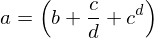

In [3]:
from proveit.lambda_map import globalRepl, SubExprRepl
from proveit.number import Add, Fraction, Exp
expr = Equals(a, Add(b, Fraction(c, d), Exp(c, d)))
expr              

`proveit.lambda_map.globalRepl` is useful for creating a global replacement lambda map.  Below, we create a map for replacing every occurence of $d$ in `expr` with anything else:

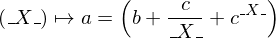

In [4]:
gRepl = globalRepl(expr, d)
gRepl

We now use this lambda map to replace occurences of $d$ in `expr` with $y$:

In [5]:
d_eq_y = Equals(d, y)
d_eq_y

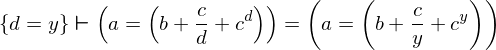

In [6]:
d_eq_y.substitution(gRepl, assumptions=[d_eq_y])

Or we can take advantage of that a global replacement is performed by default when a non-**Lambda** expression is provided as the "`lambdaMap`".

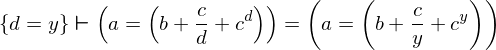

In [7]:
d_eq_y.substitution(expr, assumptions=[d_eq_y])

Either way, the generated proof is the same:

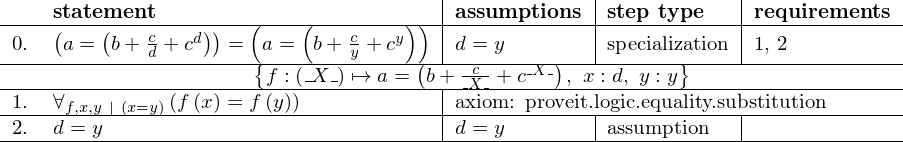

In [8]:
d_eq_y.substitution(expr, assumptions=[d_eq_y]).proof()

If we want to perform substitution for a specific sub-expression, and not necessarily a global replacement, the `proveit.lambda_map.SubExprRepl` class is extremely convenient.  It uses some Python tricks via implementing the `__getitem__` and `__getattr__` methods.  First, you create the SubExprRepl object by providing a "master" expression:

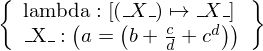

In [9]:
subExprRepl = SubExprRepl(expr)
subExprRepl

The `SubExprMap` object displays itself with two important pieces of information: the lambda map that it represents and the sub-expression of the master expression that would be replaced by this lambda map.  The point is that we will be able to "dig" in to sub-expressions of the master expression via accessing sub-expression attributes.  For example, we next will "dig" into the "right hand side" (`rhs`) of the master expression: 

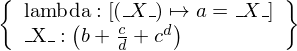

In [10]:
subExprRepl = subExprRepl.rhs
subExprRepl

By accessing the `rhs` attribute, we created a new `SubExprRepl` object that has the same master expression as the original but has a new current sub-expression.  Note that the `SubExprRepl` does not know anything about the `rhs` attribute itself; it is relying on the fact that the previous sub-expression has this attribute.  The `SubExprRepl` class also has tricks for getting an sub-expression with an index (or key):

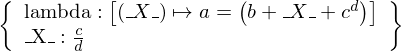

In [11]:
subExprRepl = subExprRepl.operands[1]
subExprRepl

Now will "dig" down to the denominator of $\frac{c}{d}$ and show how we use the `SubExprRepl` class to replace a particular occurence of $d$ rather than a global replacement:

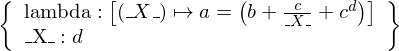

In [12]:
subExprRepl = subExprRepl.denominator
subExprRepl

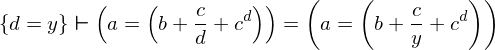

In [13]:
d_eq_y.substitution(subExprRepl, assumptions=[d_eq_y])

Let us demonstrate this technique again, replacing the other occurrence of $d$.  This time we do this more succinctly, without the extra pedogogial steps:

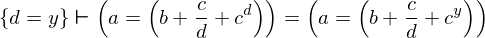

In [14]:
d_eq_y.substitution(SubExprRepl(expr).rhs.operands[2].exponent, assumptions=[d_eq_y])

The `substition` method, that we demonstrated above, is a direct application of the `substitution` axiom.  It proves the equality between some $f(x)$ and some $f(y)$.  We often will want to take a shortcut to perform a statement substitution in which we prove some $P(y)$ is true assuming that $P(x)$ is true and $P(x) = P(y)$.  For this, we have the `rhsSubstitute` and `lhsSubstitute` methods.

If the expression that we want to substitute in is on the right hand side of the `Equals` object playing the role of $x=y$, then we use `rhsSubstitute`: 

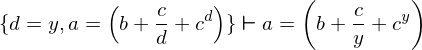

In [15]:
d_eq_y.rhsSubstitute(gRepl, assumptions=[d_eq_y,expr])

We can also take advantage of the global replacement default and provide a non-**Lambda** **Expression**.

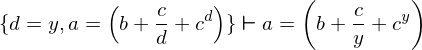

In [16]:
d_eq_y.rhsSubstitute(expr, assumptions=[d_eq_y,expr])

If the expression that we want to substitute in is on the left hand side of the `Equals` object playing the role of $x=y$, then we use `rhsSubstitute`: 

In [17]:
y_eq_d = Equals(y, d)
y_eq_d

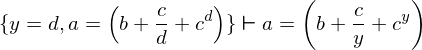

In [18]:
y_eq_d.lhsSubstitute(gRepl, assumptions=[y_eq_d,expr])

Again, we can provide a non-**Lambda** **Expression** to do a simple global replacement.

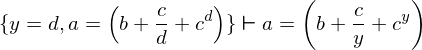

In [19]:
y_eq_d.lhsSubstitute(expr, assumptions=[y_eq_d,expr])

The proof uses a theorem the relies upon the `substitution` axiom, rather than using the `substition` axiom directly:

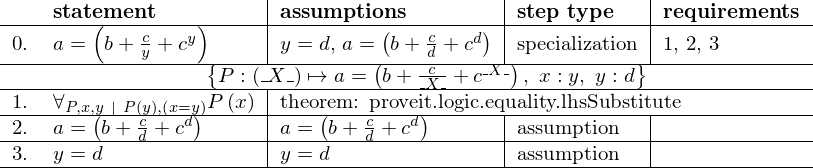

In [20]:
y_eq_d.lhsSubstitute(expr, assumptions=[y_eq_d,expr]).proof()

Reflexivity, symmetry, and transitivity
=========================

Reflexivity, symmetry, and transitivity are also fundamental properties of equality, in addition to the ability to perform substitution.  Reflexivity is the fact that any mathematical object is equal to itself.  Symmetry is the fact that $x = y$ and $y = x$ are equivalent (either both of these are true or both of these false).  Transitivity is the ability to derive $x=z$ from $x=y$ and $y=z$.  These are all axioms.

In [21]:
from proveit.logic.equality._axioms_ import equalsReflexivity, equalsSymmetry, equalsTransitivity

In [22]:
equalsReflexivity

In [23]:
equalsSymmetry

In [24]:
equalsTransitivity

`equalsReversal` is a useful theorem for applying the symmetry property of equality:

In [25]:
from proveit.logic.equality._theorems_ import equalsReversal
equalsReversal # y=x derives from x=y

These three properties are applied automatically for `Equals` objects

Reflexivity is concluded automatically:

In [26]:
Equals(a, a).prove()

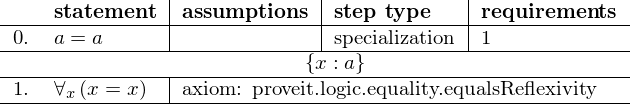

In [27]:
Equals(a, a).prove().proof()

Symmetric statements are derived as side-effects.  Note that the `KnownTruth.deriveSideEffects` method employs a mechanism to prevent infinite recursion or this would not be possible (it would continually go back and forth, proving $y=x$ from $x=y$ then $x=y$ from $y=x$, ad infinitum)

In [28]:
a_eq_b = Equals(a, b)
a_eq_b

In [29]:
Equals(b, a).prove([a_eq_b])

The reversed form may also be derived explicitly via `deriveReversed`.  The proof is the same.

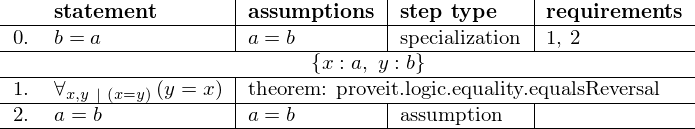

In [30]:
a_eq_b.prove([a_eq_b]).deriveReversed().proof()

Transitivity derivations are attempted with automation via the `conclude` method using the `trensitivitySearch` function in `proveit.logic.equality.transitivity_search`.  This performs a breadth-first, bidirectional search (meeting in the middle from both ends) over the space of **KnownTruth** objects representing equality and using appropriate assumptions.  This is therefore reasonably efficient.  Efficiency should not really be an issue, anyways, as long as proofs for each theorem are relatively small.  A long proof should be broken up into several smaller proofs for lemma-like theorems.  In that case (in the setting of small proofs), the space of **KnownTruth**s will be small and this search algorithm will have ample efficiency. 

In [31]:
# We'll make this interesting by reversing some of the equations in the chain.
c_eq_b = Equals(c, b) 
c_eq_b

In [32]:
c_eq_d = Equals(d, c)
c_eq_d

In [33]:
d_eq_z = Equals(d, z)
d_eq_z

In [34]:
a_eq_z = Equals(a, z).prove(assumptions=[a_eq_b, c_eq_b, c_eq_d, d_eq_z])
a_eq_z

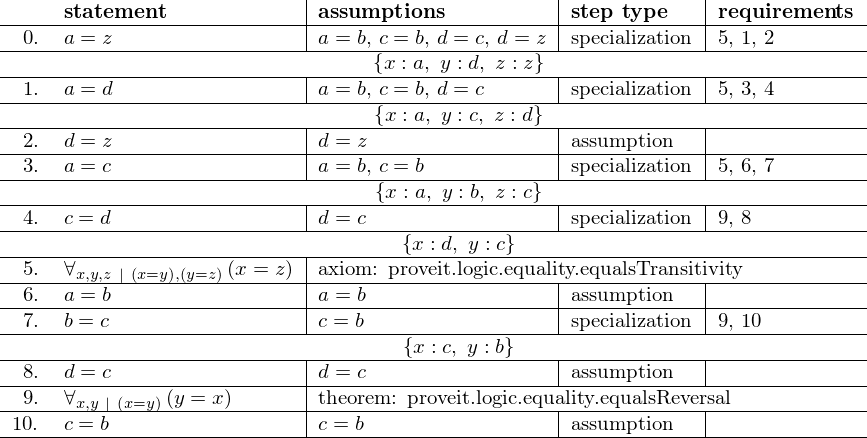

In [35]:
a_eq_z.proof()

The `applyTransivity` method applies the transitivity relation explicity. 

In [36]:
a_eq_b.prove([a_eq_b]).applyTransitivity(c_eq_b, assumptions=[c_eq_b])

## Evaluation

An evaluation is an equality in which the right hand side is an irreducible value (specifically, an instance of `proveit.logic.equality.irreducible_value.IrreducibleValue`).  An irreducible value represents a mathematical object in its simplest form.  It cannot be reduced.  The evaluation of an `IrreducibleValue` is itself.  When an evaluation is proven, the associated **KnownTruth** is stored for future reference in `Equals.evaluations` for making other evaluations.

`TRUE` ($\top$) and `FALSE` ($\bot$) are both `IrreducibleValue`s:

In [37]:
from proveit.logic import TRUE, FALSE
from proveit.logic.equality.irreducible_value import IrreducibleValue

In [38]:
isinstance(TRUE, IrreducibleValue)

True

In [39]:
isinstance(FALSE, IrreducibleValue)

True

In [40]:
TRUE.evaluate()

An `IrreducibleValue` should implement the `evalEquality` and `notEqual` methods to prove equality relations with other `IrreducibleValue`s as appropriate.

In [41]:
TRUE.evalEquality(TRUE)

In [42]:
TRUE.evalEquality(FALSE)

In [43]:
TRUE.notEqual(FALSE)

A proven expression will evaluate to `TRUE`.

In [44]:
a_eq_T = a.evaluate([a])
a_eq_T

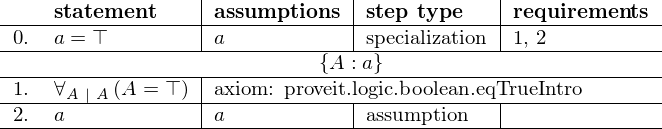

In [45]:
a_eq_T.proof()

A disproven expression will evaluate to `FALSE`.

In [46]:
a_eq_F = a.evaluate([Not(a)])
a_eq_F

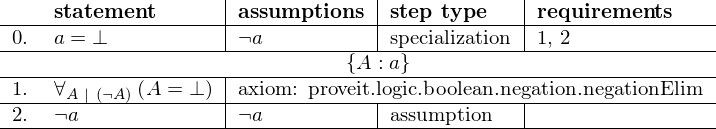

In [47]:
a_eq_F.proof()

If the expression to be evaluated is known to be equal to an expression that has already been evaluated, transitivity will automatically be applied.

In [48]:
b_eq_T = b.evaluate([Equals(b, a), Not(a)])
b_eq_T

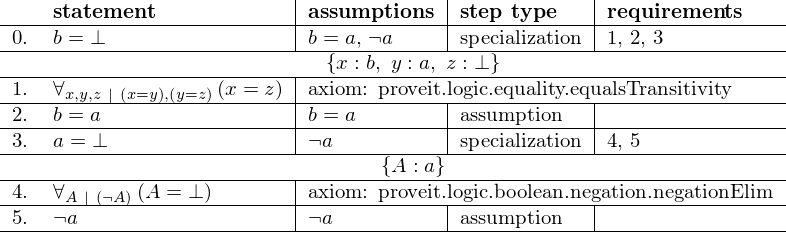

In [49]:
b_eq_T.proof()

When evaluating an expression, an evaluation of the operands will be attempted.  The operation class is responsible for overridding the `evaluate` method in order to properly treat the operation applied to irreducible values or generate a more efficient proof as appropriate.

In [50]:
from proveit.logic import Or, Not, inBool

In [51]:
nested_eval = Or(a, Not(a)).evaluate([a, b])
nested_eval

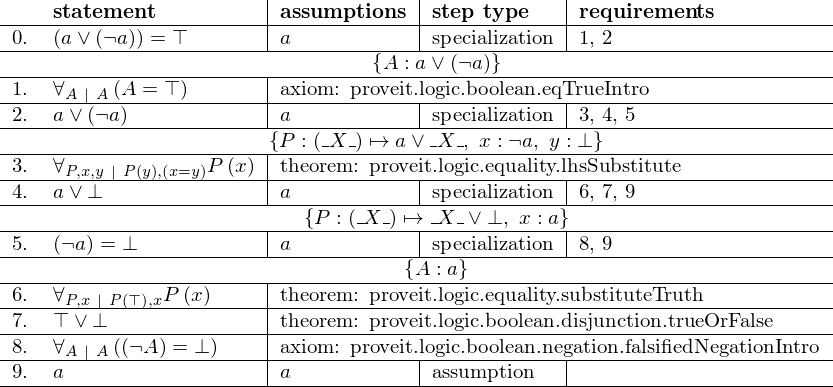

In [52]:
nested_eval.proof()

Boolean equality
================

Equality with `TRUE` ($\top$) or `FALSE` ($\bot$) has special logical consequences.  The `Equals` object has automation capabilities to treat these special kinds of equations.

In [53]:
TRUE

In [54]:
FALSE

Proofs via boolean equality are automatic via `Equals.deduceSideEffects`:

In [55]:
a.prove([Equals(a, TRUE)])

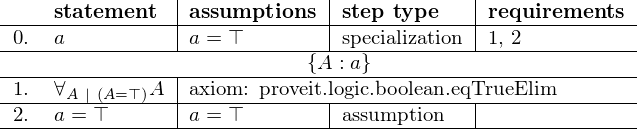

In [56]:
a.prove([Equals(a, TRUE)]).proof()

In [57]:
Not(b).prove([Equals(b, FALSE)])

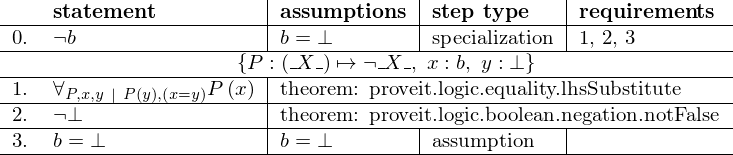

In [58]:
Not(b).prove([Equals(b, FALSE)]).proof()

Going the other direction, boolean equalities are proven automatically via `Equals.conclude`:

In [59]:
Equals(x, TRUE).prove([x])

In [60]:
Equals(TRUE, y).prove([y])

In [61]:
Equals(c, FALSE).prove([Not(c)])

In [62]:
Equals(FALSE, c).prove([Not(c)])

When something is equal to `FALSE` and known to be true, there is a contradiction.  That is, `FALSE` is a consequence.  The `deriveContradiction` method of `Equals` can be used to prove such a contradiction:

In [63]:
contradiction = Equals(a, FALSE).deriveContradiction([a, Equals(a, FALSE)])
contradiction

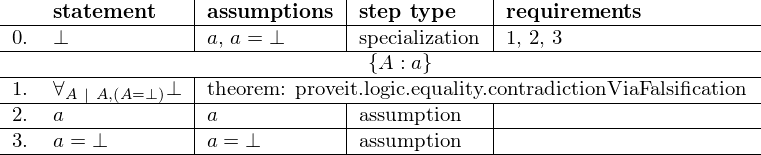

In [64]:
contradiction.proof()

Contradictions are useful in making contradiction proofs (reductio ad absurdum).  The `affirmViaContradiction` and `denyViaContradiction` methods are useful in making such a proof.  They both use `deriveContradiction`.  For example:

In [65]:
from proveit.logic import Implies, inBool
not_a__truth = Equals(a, FALSE).affirmViaContradiction(Not(a), [Implies(a, Equals(a, FALSE)), inBool(a)])
not_a__truth

In [66]:
not_a__truth.proof().numSteps

13

It is more efficient to use `denyViaContradiction` when proving the negation of something.  Here we prove the same as above but in fewer steps.

In [67]:
not_a__truth = Equals(a, FALSE).denyViaContradiction(a, [Implies(a, Equals(a, FALSE)), inBool(a)])
not_a__truth

In [68]:
not_a__truth.proof().numSteps

9

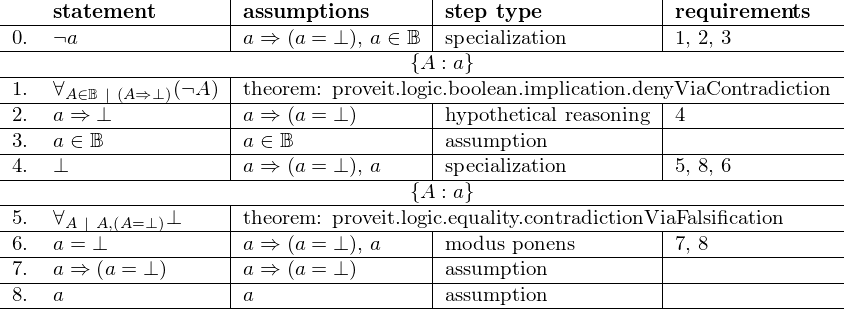

In [69]:
not_a__truth.proof()

Equality and sets
===========================

All equality expressions are in the boolean set by the `equalityInBool` axiom.  That is, given any two mathematical objects, they are either equal or not (even nonsense is either the same nonsense or different nonsense).

In [70]:
eq_in_bool = Equals(a, b).deduceInBool()
eq_in_bool

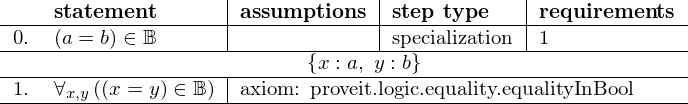

In [71]:
eq_in_bool.proof()

A singleton is a set with one element.  If $x=c$, then $x$ is in the singleton set of $\{c\}$:

In [72]:
in_singleton_truth = Equals(x, c).deriveIsInSingleton([Equals(x, c)])
in_singleton_truth

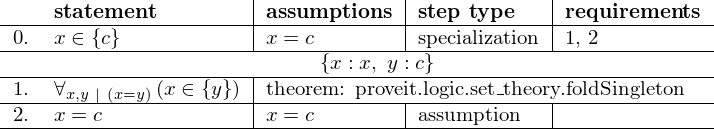

In [73]:
in_singleton_truth.proof()

Not equals
==========

The `NotEquals` operation is a more way of expressing that two mathematical objects are not equal to each other.

In [74]:
from proveit.logic import NotEquals

In [75]:
a_neq_b = NotEquals(a, b)
a_neq_b

In [76]:
a_neq_b.definition()

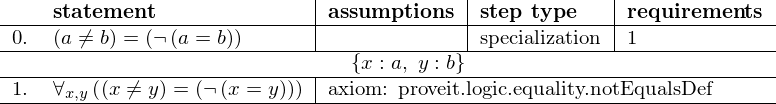

In [77]:
a_neq_b.definition().proof()

From $\lnot (a = b)$ one can derive $a \neq b$ and vice-versa, folding and unfolding the `NotEquals`.

In [78]:
a_neq_b.prove([Not(a_eq_b)])

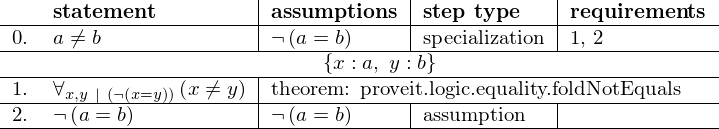

In [79]:
a_neq_b.prove([Not(a_eq_b)]).proof()

In [80]:
Not(a_eq_b).prove([a_neq_b])

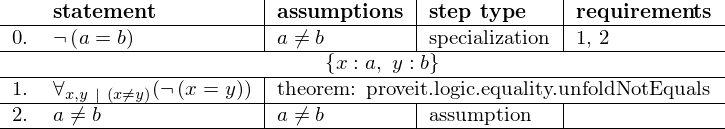

In [81]:
Not(a_eq_b).prove([a_neq_b]).proof()

`NotEquals` also has a symmetry property which can be applied directly.  It can be proven  through automation.

In [82]:
NotEquals(b, a).prove([a_neq_b])

Or explicitly via `deriveReversed`

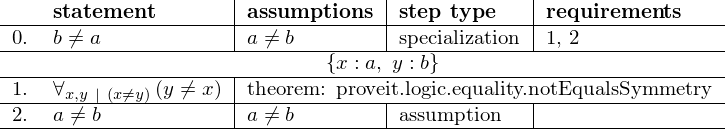

In [83]:
a_neq_b.prove([a_neq_b]).deriveReversed().proof()

If two objects are both equal and not equal, there is a contradiction.

In [84]:
neq_contradiction = a_neq_b.deriveContradiction([a_neq_b, a_eq_b])
neq_contradiction

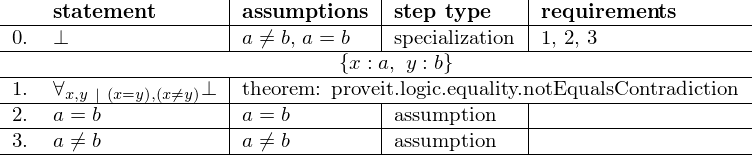

In [85]:
neq_contradiction.proof()

In [86]:
a_neq_a = NotEquals(a, a)
a_neq_a

In [87]:
a_neq_a.affirmViaContradiction(b, [Implies(Not(b), a_neq_a), inBool(b)])